<a href="https://colab.research.google.com/github/fanegass/Problem-Set-2/blob/main/problemset4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  5 of 5 completed
<ipython-input-3-82430d6751cb>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1], model


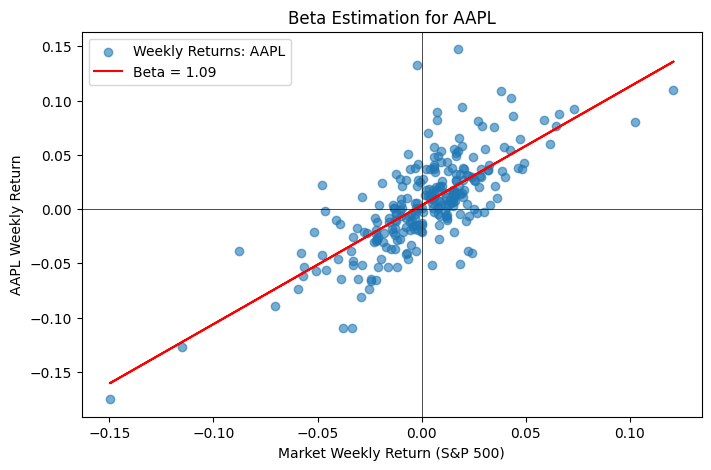

<ipython-input-3-82430d6751cb>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1], model


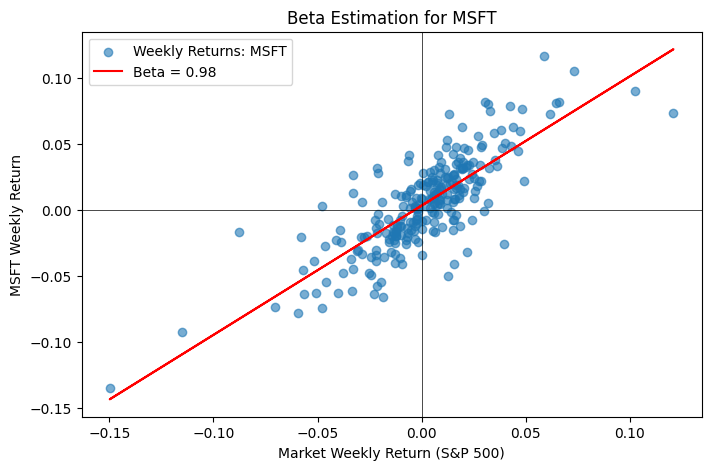

<ipython-input-3-82430d6751cb>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1], model


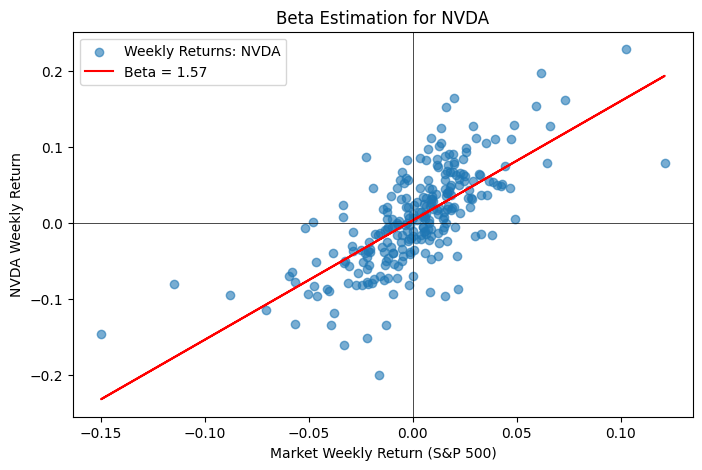

<ipython-input-3-82430d6751cb>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1], model


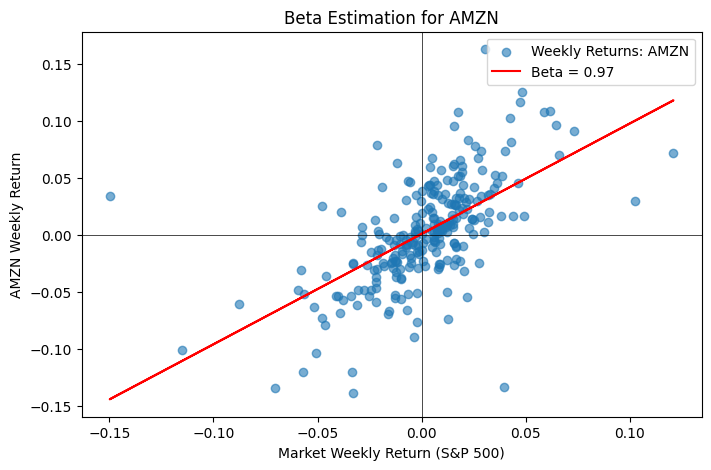

<ipython-input-3-82430d6751cb>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1], model


Individual Stock Betas:
AAPL: 1.09
MSFT: 0.98
NVDA: 1.57
AMZN: 0.97
Equal-Weighted Portfolio Beta: 1.15


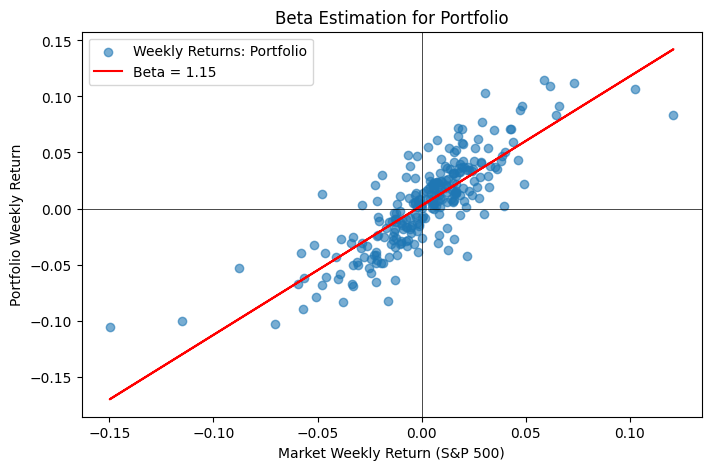

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def download_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)
    if 'Adj Close' in data.columns:
        data = data['Adj Close']
    else:
        data = data['Close']
    return data

def calculate_weekly_returns(data):
    return data.resample('W').ffill().pct_change().dropna()

def compute_beta(stock_returns, market_returns):
    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X).fit()
    return model.params[1], model

def plot_beta(stock, market_returns, stock_returns, beta, model):
    plt.figure(figsize=(8,5))
    plt.scatter(market_returns, stock_returns, alpha=0.6, label=f'Weekly Returns: {stock}')
    plt.plot(market_returns, model.predict(sm.add_constant(market_returns)), color='red', label=f'Beta = {beta:.2f}')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel("Market Weekly Return (S&P 500)")
    plt.ylabel(f"{stock} Weekly Return")
    plt.legend()
    plt.title(f"Beta Estimation for {stock}")
    plt.show()

def main():
    market_ticker = "^GSPC"
    stock_tickers = ["AAPL", "MSFT", "NVDA", "AMZN"]
    start_date, end_date = "2018-01-01", "2023-01-01"

    tickers = [market_ticker] + stock_tickers
    data = download_data(tickers, start_date, end_date)
    weekly_returns = calculate_weekly_returns(data)

    market_returns = weekly_returns[market_ticker]
    betas = {}

    for stock in stock_tickers:
        beta, model = compute_beta(weekly_returns[stock], market_returns)
        betas[stock] = beta
        plot_beta(stock, market_returns, weekly_returns[stock], beta, model)

    portfolio_returns = weekly_returns[stock_tickers].mean(axis=1)
    portfolio_beta, portfolio_model = compute_beta(portfolio_returns, market_returns)

    print("Individual Stock Betas:")
    for stock, beta in betas.items():
        print(f"{stock}: {beta:.2f}")
    print(f"Equal-Weighted Portfolio Beta: {portfolio_beta:.2f}")

    plot_beta("Portfolio", market_returns, portfolio_returns, portfolio_beta, portfolio_model)

if __name__ == "__main__":
    main()